In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

In [11]:

df_ns2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_NS2.csv')
df_ew2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_EW2.csv')

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
print(df_ns2.columns.tolist())

['Unnamed: 0', 'Unnamed: 0.1', 'X', 'Code', 'Address', 'Vs30', 'Z1', 'MT_Magnitude_', 'MT_Depth_', 'rrup_0', 'rrup_1', 'rjb_0', 'rjb_1', 'rhypo_0', 'rhypo_1', 'repi_0', 'repi_1', 'depth', 'Origin_day_', 'originDate', 'Origin_Time_', 'Longitude_', 'Latitude_', 'Region_Name_', 'samplingFreq', 'lon', 'lat', 'Tectonic_Garcia_', 'Tectonic_Zhoa_', 'JMA_Depth_', 'Focal_mechanism_kegan_', 'Strike_', 'recordDate', 'station Lon', 'station Lat', 'origin Time', 'Number_of_Stations_', 'Mo_', 'scale Factor', 'Dip_', 'direction', 'Ztor_0', 'Ztor_1', 'Focal_mechanism_Garcia_', 'Rake_', 'duration Time', 'mag', 'snr_EW1', 'snr_NS1', 'snr_EW2', 'snr_NS2', 'fLow_EW1', 'fLow_NS1', 'fLow_EW2', 'fLow_NS2', 'fHigh_EW1', 'fHigh_NS1', 'fHigh_EW2', 'fHigh_NS2', 'pga_EW1', 'pga_NS1', 'pga_EW2', 'pga_NS2', 'Ia_EW1', 'Ia_NS1', 'Ia_EW2', 'Ia_NS2', 'D5_75_EW1', 'D5_75_NS1', 'D5_75_EW2', 'D5_75_NS2', 'D5_75_sorted_EW1', 'D5_75_sorted_NS1', 'D5_75_sorted_EW2', 'D5_75_sorted_NS2', 'D20_80_EW1', 'D20_80_NS1', 'D20_80_EW2

In [14]:
df=df_ns2[['MT_Magnitude_','rjb_0','Vs30','D5_75_NS2','D20_80_NS2','D5_95_NS2','D5_75_EW2','D20_80_EW2','D5_95_EW2']]

In [15]:
from scipy import stats
df['_5_75']=stats.gmean(df.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df['_20_80']=stats.gmean(df.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)
df['_5_95']=stats.gmean(df.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [16]:
df=df.reset_index()
df.shape

(59011, 13)

In [17]:
df.dropna(axis=0,inplace=True)

In [28]:
input_var=df[['MT_Magnitude_','rjb_0','Vs30']]

In [29]:
y_var=df[['_20_80']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[2.74337712],
       [2.51974628],
       [1.48279566],
       ...,
       [1.76501513],
       [1.19410609],
       [1.74090458]])

In [30]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.1, random_state=2)

In [31]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [32]:
from tensorflow.keras.optimizers import Adam

In [33]:
model=Sequential([Dense(units=10, input_shape=(3,), activation='tanh'),
                 
                  Dense(units=1, activation='linear')
                 ])

In [34]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 43575 samples, validate on 4842 samples
Epoch 1/150
43575/43575 [==============================] - 1s 13us/step - loss: 0.6726 - val_loss: 0.4600
Epoch 2/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4341 - val_loss: 0.4436
Epoch 3/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4260 - val_loss: 0.4418
Epoch 4/150
43575/43575 [==============================] - 1s 11us/step - loss: 0.4216 - val_loss: 0.4322
Epoch 5/150
43575/43575 [==============================] - 1s 12us/step - loss: 0.4206 - val_loss: 0.4331
Epoch 6/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4190 - val_loss: 0.4310
Epoch 7/150
43575/43575 [==============================] - 1s 12us/step - loss: 0.4178 - val_loss: 0.4294
Epoch 8/150
43575/43575 [==============================] - 1s 12us/step - loss: 0.4167 - val_loss: 0.4289
Epoch 9/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4168 - val_loss: 0.42

43575/43575 [==============================] - 0s 11us/step - loss: 0.4082 - val_loss: 0.4220
Epoch 78/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4068 - val_loss: 0.4157
Epoch 79/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4077 - val_loss: 0.4148
Epoch 80/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4075 - val_loss: 0.4166
Epoch 81/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4066 - val_loss: 0.4165
Epoch 82/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4072 - val_loss: 0.4180
Epoch 83/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4076 - val_loss: 0.4163
Epoch 84/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4075 - val_loss: 0.4192
Epoch 85/150
43575/43575 [==============================] - 0s 11us/step - loss: 0.4085 - val_loss: 0.4157
Epoch 86/150
43575/43575 [========================

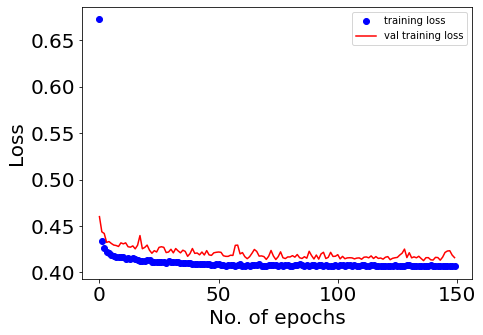

In [35]:
history=model.fit(X_train, y_train,batch_size=128, epochs=150, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(7,5))

plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)


In [36]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.394
R2 score on test set is :	0.404


Text(0.5, 1.0, 'Duration 20_80')

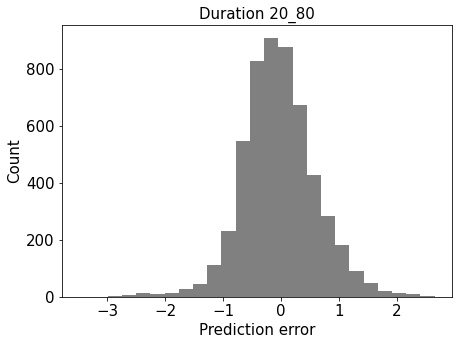

In [37]:
error=y_test_pred-y_test
plt.figure(figsize=(7,5))
plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Duration 20_80', fontsize=15)

<Figure size 432x288 with 0 Axes>

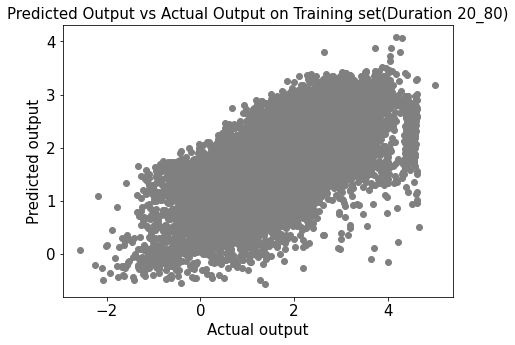

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(7,5))
plt.plot(y_train, y_train_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=15)
plt.ylabel('Predicted output',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Predicted Output vs Actual Output on Training set(Duration 20_80)', fontsize=15)

plt.figure()

<Figure size 432x288 with 0 Axes>

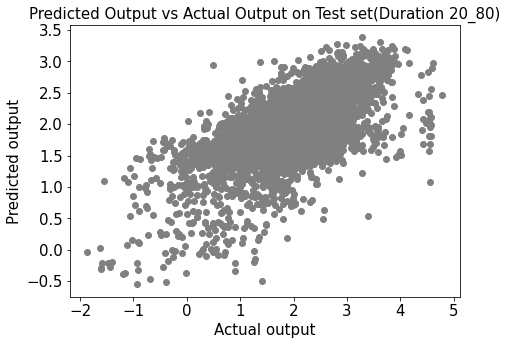

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(7,5))
plt.plot(y_test, y_test_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=15)
plt.ylabel('Predicted output',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Predicted Output vs Actual Output on Test set(Duration 20_80)', fontsize=15)

plt.figure()

In [40]:
X_data=np.array(preprocessing.scale(input_var))
X_data

array([[ 0.60218713,  1.30029062, -1.11629738],
       [ 0.60218713,  1.46695887, -0.83380391],
       [ 0.60218713,  0.69376887, -0.23860593],
       ...,
       [-1.21555841, -0.9212732 , -0.63495896],
       [-1.21555841, -1.18534087,  0.44447729],
       [-1.21555841, -0.95412353, -1.24754661]])

In [41]:
y_pred=model.predict(X_data)
y_pred

array([[2.686084 ],
       [2.6013079],
       [2.123673 ],
       ...,
       [1.574775 ],
       [1.2787938],
       [1.7949746]], dtype=float32)

In [42]:
output_y=df[['_20_80']]
output_y=np.log(output_y)
output_y

,_20_80
0,2.743377
1,2.519746
2,1.482796
3,1.652969
4,2.390860
...,...
59006,0.943535
59007,1.888596
59008,1.765015
59009,1.194106


In [43]:
residual=output_y-y_pred
residual.max()

_20_80    4.174691
dtype: float64

In [44]:
input_var

,MT_Magnitude_,rjb_0,Vs30
0,5.0,201.366205,241.153846
1,5.0,212.569993,301.324503
2,5.0,160.594546,428.100722
3,5.0,195.256405,448.533640
4,5.0,220.505360,274.027568
...,...,...,...
59006,3.6,48.584792,371.462264
59007,3.6,70.884798,328.979157
59008,3.6,52.028046,343.678161
59009,3.6,34.276865,573.596358


In [45]:
mag=input_var['MT_Magnitude_']
dis=input_var['rjb_0']
sh_wv=input_var['Vs30']

In [46]:
calc=pd.concat([mag,dis,sh_wv,residual], axis=1)
calc.shape

(53797, 4)

In [47]:
a=[]
for i in np.arange(3.5,7.5,0.5):
    b=calc[(calc.MT_Magnitude_ >= i ) & (calc.MT_Magnitude_ <=i+0.5)]._20_80.mean()
    a.append(b)
    
a=np.array(a)
a

array([-0.0051804 ,  0.01848133,  0.02751888,  0.07512465,  0.09198701,
        0.06037369,  0.10291806,  0.21816698])

In [48]:
from numpy import arange
c=[]
for i in arange(3.5,7.5,0.5):
    c.append(i)
    

Text(0.5, 1.0, 'Dur_20_80')

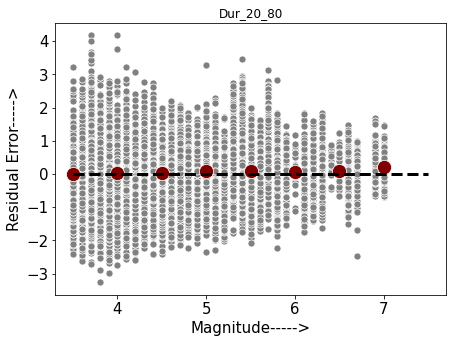

In [49]:
x=input_var['MT_Magnitude_']
y=residual['_20_80']
plt.figure(figsize=(7,5))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('Residual Error----->', size=15)
plt.xlabel('Magnitude----->', size=15)
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Dur_20_80')

In [51]:
a=[]
for i in np.arange(0,300,25):
    b=calc[(calc.rjb_0 >= i ) & (calc.rjb_0 <=i+25)]._20_80.mean()
    a.append(b)
    
a=np.array(a)
a


array([0.0793342 , 0.01824226, 0.01755301, 0.00192023, 0.01199632,
       0.01507213, 0.03416106, 0.05372407, 0.06039816, 0.05826113,
       0.08034287, 0.10525983])

In [52]:
c=[]
for i in range(0,300,25):
    c.append(i)
c    

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]

Text(0.5, 1.0, 'Dur_20_80')

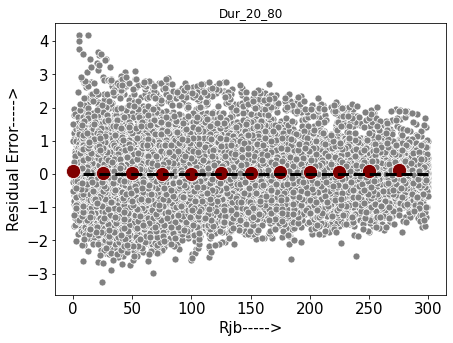

In [53]:
x=input_var['rjb_0']
y=residual['_20_80']
plt.figure(figsize=(7,5))
plt.hlines(y=0,xmin=300, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('Residual Error----->', size=15)
plt.xlabel('Rjb----->', size=15)
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Dur_20_80')

In [55]:
a=[]
for i in np.arange(100,2100,100):
    b=calc[(calc.Vs30 >= i ) & (calc.Vs30 <=i+100)]._20_80.mean()
    a.append(b)
    
a=np.array(a)
a


array([ 0.13853945,  0.00576479,  0.04942177,  0.03664561,  0.02228813,
       -0.0271716 , -0.06176404,  0.11582254,  0.08408818, -0.10947758,
       -0.06254472,  0.31349752, -0.22850276, -0.20415883,         nan,
       -0.18223889,         nan,         nan,  0.46563486, -0.8755659 ])

In [56]:
c=[]
for i in range(100,2100,100):
    c.append(i)


Text(0.5, 1.0, 'Dur_20_80')

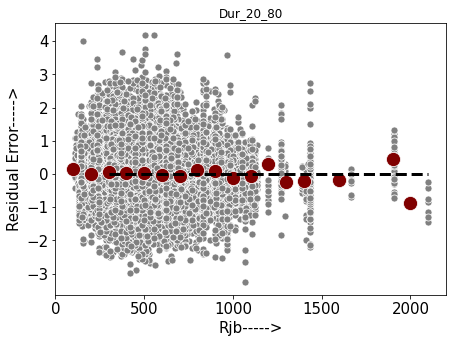

In [57]:
x=input_var['Vs30']
y=residual['_20_80']
plt.figure(figsize=(7,5))
plt.hlines(y=0,xmin=300, xmax=2100,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('Residual Error----->', size=15)
plt.xlabel('Rjb----->', size=15)
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Dur_20_80')